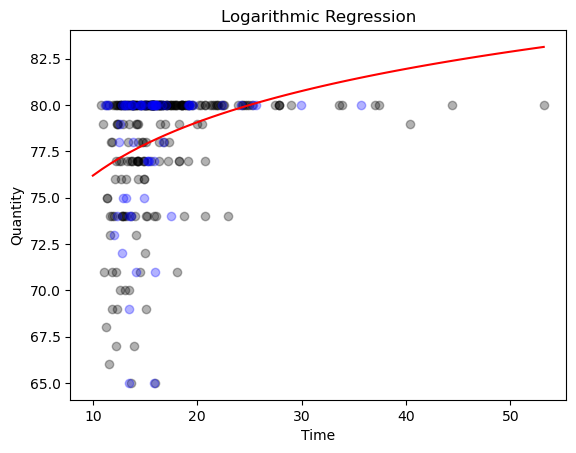

R-Squared: 0.06056062884790481
Mean Squared Error: 12.757288746120771
Mean Absolute Error: 2.603191769614409
Median Absolute Error: 1.970145448667509
RMSE: 3.5717346970513884


In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error


# subfolder = 'Project/'    # Terminal
subfolder = '../'          # Jupyter

dataset = pd.read_csv(f'{subfolder}Dataset/Andrea Muzii - Numbers.txt') # import the dataset
# mask = dataset.iloc[:, 1] > 25
# dataset = dataset.drop(dataset[mask].index)
X = np.array(dataset.iloc[:, 1])
X = X.reshape(len(X),1) # independent vars: take all rows, all columns except last one
y = np.array(dataset.iloc[:, 0].values).reshape(-1,1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split # import library class to split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Transform x to logarithmic scale
x_log = np.log(X_train)

# Fit linear regression on transformed data
model = LinearRegression()

# def median_absolute_error_loss(y_true, y_pred):
#     return median_absolute_error(y_true, y_pred)
# model.loss = median_absolute_error_loss

model.fit(x_log.reshape(-1, 1), y_train)

# Predict y values for new data points
#x_new = np.array([6, 7, 8])
x_test_log = np.log(X_test)
y_pred = model.predict(x_test_log.reshape(-1, 1))

# Create scatter plot of sample data
plt.scatter(X_train, y_train, alpha=0.3, color='black')
plt.scatter(X_test, y_test, alpha=0.3, color='blue')

# Create line plot of regression line
x_range = np.linspace(10, max(X), 50)
x_range_log = np.log(x_range)
y_range_pred = model.predict(x_range_log.reshape(-1, 1))
plt.plot(x_range, y_range_pred, color='red')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Logarithmic Regression')

# Display the plot
plt.show()




# Performance Measures
r2 = r2_score(y_test, y_pred)
print("R-Squared:", r2)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
mdae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", mdae)
rmse = np.sqrt(mse)
print("RMSE:", rmse)